In [35]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import pickle
import os, sys

In [36]:
# make sure pandas is version 1.0 or higher
# make sure networkx is verion 2.4 or higher
print(pd.__version__)
print(nx.__version__)

parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.insert(0, parent_dir)
# os.chdir("..")

2.2.3
3.4.2


In [37]:
from ema_workbench import (
    Model,
    Policy,
    ema_logging,
    SequentialEvaluator,
    MultiprocessingEvaluator,
)
from dike_model_function import DikeNetwork  # @UnresolvedImport
from problem_formulation import get_model_for_problem_formulation, sum_over, sum_over_time



In [38]:
ema_logging.log_to_stderr(ema_logging.INFO)
os.chdir("/Users/benschaefer/Desktop/epa141-model/final assignment")
print(os.getcwd())
# choose problem formulation number, between 0-5
# each problem formulation has its own list of outcomes
dike_model, planning_steps = get_model_for_problem_formulation(5)

/Users/benschaefer/Desktop/epa141-model/final assignment
[IntegerParameter('0_RfR 0', 0, 1, resolution=None, default=None, variable_name=['0_RfR 0'], pff=False), IntegerParameter('1_RfR 0', 0, 1, resolution=None, default=None, variable_name=['1_RfR 0'], pff=False), IntegerParameter('2_RfR 0', 0, 1, resolution=None, default=None, variable_name=['2_RfR 0'], pff=False), IntegerParameter('3_RfR 0', 0, 1, resolution=None, default=None, variable_name=['3_RfR 0'], pff=False), IntegerParameter('4_RfR 0', 0, 1, resolution=None, default=None, variable_name=['4_RfR 0'], pff=False), IntegerParameter('EWS_DaysToThreat', 0, 1, resolution=None, default=None, variable_name=['EWS_DaysToThreat'], pff=False), IntegerParameter('A.1_DikeIncrease 0', 0, 10, resolution=None, default=None, variable_name=['A.1_DikeIncrease 0'], pff=False), IntegerParameter('A.2_DikeIncrease 0', 0, 10, resolution=None, default=None, variable_name=['A.2_DikeIncrease 0'], pff=False), IntegerParameter('A.3_DikeIncrease 0', 0, 10, 

In [39]:
# EXP_PATH = "./saved_runs/subspace_experiments.pkl"
# OUT_PATH = "./saved_runs/subspace_outcomes.pkl"
EXP_PATH = "./saved_runs/base_case_exp.pkl"
OUT_PATH = "./saved_runs/base_case_out.pkl"

with open(EXP_PATH, "rb") as file:
    experiments_df = pickle.load(file)
with open(OUT_PATH, "rb") as file:
    outcome_df = pickle.load(file)

In [40]:
outcome_df = pd.DataFrame({k: v.flatten() for k, v in outcome_df.items()})

In [41]:
print(len(outcome_df))

2500


In [42]:
label = 'A.3_Expected Number of Deaths'
# label = "RfR Total Costs"

data = outcome_df[label]
# threshold = data.quantile(0.90)
threshold = 0.6
print(threshold)
y = data >= threshold

0.6


<Axes: xlabel='Expected flood-related annual deaths ', ylabel='Number of Scenarios'>

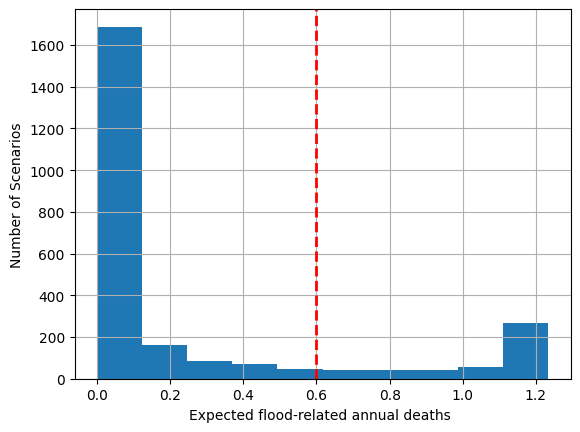

In [43]:
# for col in outcome_df.columns:
# plt.title(f"{col}")
# outcome_df[col].hist()
# plt.show()
# plt.close()

plt.xlabel("Expected flood-related annual deaths ")
plt.ylabel("Number of Scenarios")
plt.axvline(x=threshold, color='red', linestyle='--', linewidth=2)
outcome_df["A.3_Expected Number of Deaths"].hist()
#.sort_values(ascending=False).head()
# plt.show()
# plt.close()

In [44]:
cleaned_experiments = experiments_df.drop(labels=[l.name for l in dike_model.levers], axis=1)

In [45]:
np.sum(y)

np.int64(454)

In [46]:
y = np.array(y)

In [47]:
from ema_workbench.analysis import prim
from ema_workbench.analysis import scenario_discovery_util as sdutil

prim_alg = prim.Prim(cleaned_experiments,y, threshold=0.5)
box1 = prim_alg.find_box()

[MainProcess/INFO] column policy dropped from analysis because it has only one category


[MainProcess/INFO] column model dropped from analysis because it has only one category
[MainProcess/INFO] 2500 points remaining, containing 454 cases of interest


binary


[MainProcess/INFO] mean: 1.0, mass: 0.1252, coverage: 0.6894273127753304, density: 1.0 restricted_dimensions: 3


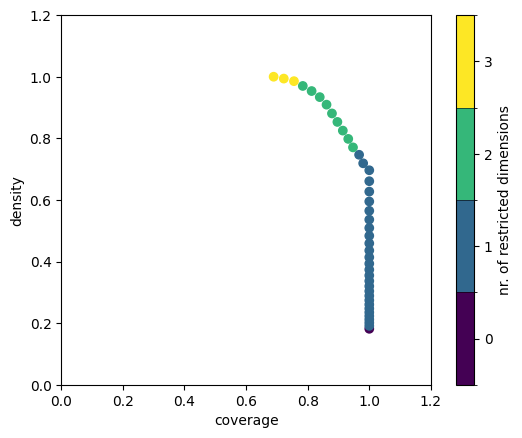

In [48]:
box1.show_tradeoff()
plt.show()

In [49]:
# box1.peeling_trajectory[box1.peeling_trajectory["res_dim"] == 4]

In [50]:
# box1.select(54)

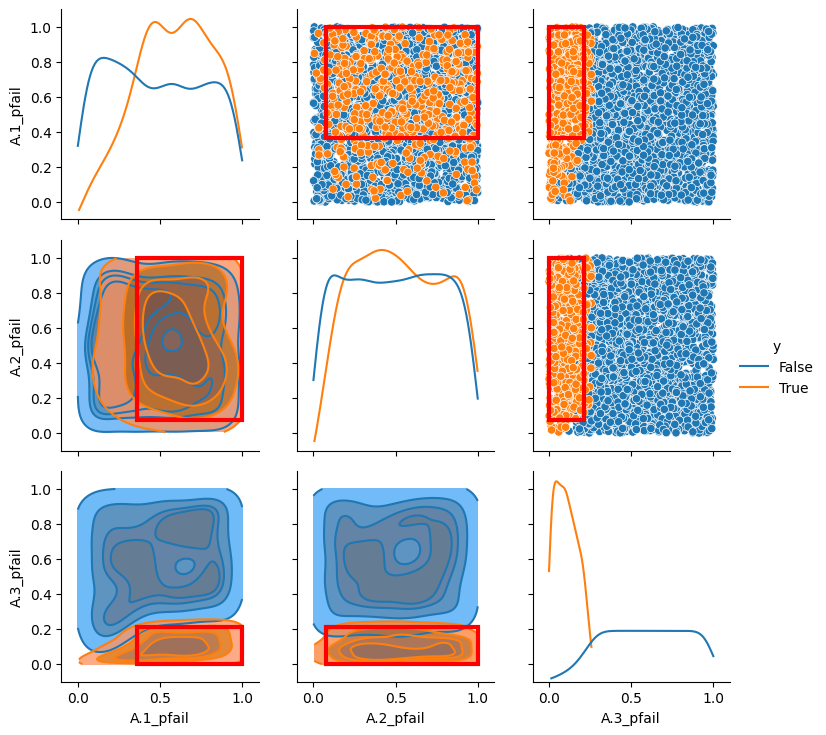

In [51]:
box1.show_pairs_scatter()

[<Figure size 640x480 with 1 Axes>]

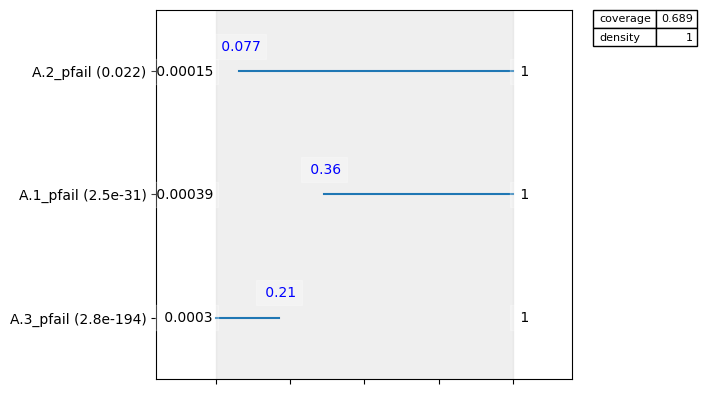

In [52]:
box1.inspect(style="graph")

In [53]:
# from ema_workbench.analysis import dimensional_stacking
# dimensional_stacking.create_pivot_plot(cleaned_experiments, y)

In [54]:
outcome_df["A.3_Expected Number of Deaths"]
outcome_df.sort_values(by="A.3_Expected Number of Deaths",ascending=False)

,A.1_Expected Annual Damage,A.1_Dike Investment Costs,A.1_Expected Number of Deaths,A.2_Expected Annual Damage,A.2_Dike Investment Costs,A.2_Expected Number of Deaths,A.3_Expected Annual Damage,A.3_Dike Investment Costs,A.3_Expected Number of Deaths,A.4_Expected Annual Damage,A.4_Dike Investment Costs,A.4_Expected Number of Deaths,A.5_Expected Annual Damage,A.5_Dike Investment Costs,A.5_Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs
736,4.620623e+05,0,0.000290,4.664833e+06,0,0.004000,8.579169e+08,0,1.232967,0.000000e+00,0,0.000000,0.000000e+00,0,0.000000,0.0,0.0
1551,0.000000e+00,0,0.000000,5.185439e+06,0,0.007295,5.124946e+08,0,1.226270,0.000000e+00,0,0.000000,0.000000e+00,0,0.000000,0.0,0.0
351,1.022066e+07,0,0.010573,0.000000e+00,0,0.000000,5.122996e+08,0,1.225588,0.000000e+00,0,0.000000,0.000000e+00,0,0.000000,0.0,0.0
2153,2.004676e+07,0,0.016361,8.499289e+06,0,0.009366,6.452287e+08,0,1.224776,7.748772e+06,0,0.003049,0.000000e+00,0,0.000000,0.0,0.0
841,2.418705e+07,0,0.010649,5.785786e+06,0,0.003462,1.203563e+09,0,1.223469,0.000000e+00,0,0.000000,0.000000e+00,0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1216,5.427638e+07,0,0.023474,6.877689e+07,0,0.038695,0.000000e+00,0,0.000000,4.028661e+07,0,0.011000,0.000000e+00,0,0.000000,0.0,0.0
1156,8.794253e+08,0,0.647626,0.000000e+00,0,0.000000,0.000000e+00,0,0.000000,0.000000e+00,0,0.000000,0.000000e+00,0,0.000000,0.0,0.0
1157,1.657767e+09,0,0.655663,0.000000e+00,0,0.000000,0.000000e+00,0,0.000000,0.000000e+00,0,0.000000,1.961626e+07,0,0.010678,0.0,0.0
1165,1.171625e+09,0,0.652767,0.000000e+00,0,0.000000,0.000000e+00,0,0.000000,0.000000e+00,0,0.000000,0.000000e+00,0,0.000000,0.0,0.0


In [57]:
worst_case_row = experiments_df.iloc[736]
worst_case_outcome = outcome_df.iloc[736]


In [58]:

for label in worst_case_row.index.copy():
    if "RfR" in label:
        worst_case_row.drop(label, inplace=True)
    if "DikeIncrease" in label:
        worst_case_row.drop(label, inplace=True)
    
    # worst_case_row.drop("scenario", inplace=True)
    # worst_case_row.drop("policy", inplace=True)
    # worst_case_row.drop("EWS_DaysToThreat", inplace=True)

print(os.getcwd())

with open("./saved_runs/reference_cases/worst_case_zutphen.pkl", "wb") as file:
    pickle.dump(pd.concat([worst_case_row, worst_case_outcome]), file)

print(worst_case_row)

/Users/benschaefer/Desktop/epa141-model/final assignment
A.0_ID flood wave shape           123
A.1_Bmax                    34.618959
A.1_Brate                         1.0
A.1_pfail                    0.853211
A.2_Bmax                   308.938757
A.2_Brate                         1.5
A.2_pfail                    0.983001
A.3_Bmax                   250.971698
A.3_Brate                        10.0
A.3_pfail                    0.120234
A.4_Bmax                   267.138082
A.4_Brate                         1.5
A.4_pfail                    0.186781
A.5_Bmax                   189.163757
A.5_Brate                         1.5
A.5_pfail                    0.480809
discount rate 0                   2.5
EWS_DaysToThreat                    0
scenario                          736
policy                     Do Nothing
model                        dikesnet
Name: 736, dtype: object


/var/folders/gp/zwnx1q2x7p9fcz4l931qnclc0000gn/T/ipykernel_15295/1126824390.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  worst_case_row.drop(label, inplace=True)
/var/folders/gp/zwnx1q2x7p9fcz4l931qnclc0000gn/T/ipykernel_15295/1126824390.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  worst_case_row.drop(label, inplace=True)
/var/folders/gp/zwnx1q2x7p9fcz4l931qnclc0000gn/T/ipykernel_15295/1126824390.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return